# Imports

In [2]:

import networkx as nx
import matplotlib.pyplot as plt

#topology_dir = "C:/Users/bbenc/Documents/NETWORKZ/cloud_work/src/"
topology_dir = "C:/Users/bbenc/OneDrive/Documents/aGraph/cloud_work/src/"
G = nx.read_gml(topology_dir+"26_usa.gml")



In [ ]:
graph = G;
# Get the number of nodes and edges in the network
num_nodes = len(graph.nodes())
num_edges = len(graph.edges())

# Calculate the average degree of the network
avg_degree = sum(dict(graph.degree()).values()) / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree}")

graph.edges()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

topology_dir = "C:/Users/bbenc/Documents/NETWORKZ/cloud_work/src/"

# Load the graph from the GML file
graph = nx.read_gml(topology_dir + "50_germany.gml")

# Retrieve node positions from the 'Longitude' and 'Latitude' attributes
pos = {node_id: (data['Longitude'], data['Latitude']) for node_id, data in graph.nodes(data=True)}

# Create a basic network visualization
nx.draw(graph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=6)

# Display the visualization
plt.show()


In [5]:
## UTILS AND METHODS
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_players(num_players=10, x_range=(0, 100), y_range=(0, 100)):
    players = {}
    x_start, x_stop = x_range
    y_start, y_stop = y_range
    for i in range(num_players):
        player_name = f"P{i+1}"
        x = random.uniform(x_start, x_stop)
        y = random.uniform(y_start, y_stop)
        players[player_name] = (x, y)
    return players



def generate_servers():
    # Prediktív szerverek pozíciói
    servers = {
        "S1": (0, 0),
        "S2": (50, 50),
        "S3": (100, 100)
    }
    return servers


def connect_player_to_server(players, player, servers, G):
    player_position = players[player]
    
    # Legközelebbi szerver kiválasztása
    closest_server = min(servers, key=lambda server: abs(player_position[0] - servers[server][0]) + abs(player_position[1] - servers[server][1]))
    
    # Él hozzáadása a játékos és a legközelebbi szerver között
    distance = abs(player_position[0] - servers[closest_server][0]) + abs(player_position[1] - servers[closest_server][1])
    G.add_edge(player, closest_server, weight=distance)
    
    return G


def draw_graph(G, pos, servers, players, canvas_size, node_size=200, show_edge_labels=False):
    plt.figure(figsize=canvas_size)
    print(G.edges())
    # Szerverek kirajzolása
    nx.draw_networkx_nodes(G, pos, nodelist=servers.keys(), node_color='b', node_size=2.5*node_size, label="Servers")
    # Játékosok kirajzolása
    nx.draw_networkx_nodes(G, pos, nodelist=players.keys(), node_color='g', node_size=node_size, label="Players")

    # Élek kirajzolása
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)


    # Él súlyok (távolságok) hozzáadása
    if show_edge_labels:
        edge_labels = {(player, server): G[player][server]["weight"] for player, server in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Címkék hozzáadása a csomópontokhoz
    node_labels = {node: node for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=node_labels)

    # Kirajzolás beállításai
    plt.title("Szerverek és Játékosok")
    plt.show()


In [ ]:
# Játékosok pozícióinak generálása
num_players = 100
random_range = 100
players = generate_players(num_players, random_range)

servers = generate_servers()

# Gráf létrehozása és pozíciók hozzáadása
G = nx.Graph()
G.add_nodes_from(servers.keys())
G.add_nodes_from(players.keys())

# Játékosok összekapcsolása a legközelebbi szerverekkel
for player in players:
    G = connect_player_to_server(player, servers, G)

# Pozíció információk előkészítése és gráf kirajzolása
pos = {**servers, **players}
draw_graph(G, pos, canvas_size=(24, 20), node_size=300, show_edge_labels=False)

[('0', '24'), ('0', '15'), ('0', '1'), ('0', 'P28'), ('0', 'P38'), ('0', 'P49'), ('0', 'P54'), ('0', 'P55'), ('1', '14'), ('1', '13'), ('1', '24'), ('1', 'P3'), ('1', 'P52'), ('1', 'P68'), ('2', '24'), ('2', '25'), ('2', '21'), ('2', '19'), ('2', 'P44'), ('3', '25'), ('3', '5'), ('3', '11'), ('3', 'P10'), ('3', 'P19'), ('3', 'P21'), ('3', 'P30'), ('3', 'P62'), ('3', 'P75'), ('3', 'P80'), ('4', '6'), ('4', '5'), ('4', '11'), ('4', 'P2'), ('4', 'P41'), ('4', 'P92'), ('5', '25'), ('5', '23'), ('5', 'P8'), ('5', 'P15'), ('5', 'P22'), ('5', 'P35'), ('5', 'P90'), ('6', '8'), ('6', '9'), ('6', '7'), ('6', 'P34'), ('6', 'P37'), ('6', 'P63'), ('6', 'P64'), ('6', 'P83'), ('7', '10'), ('7', '22'), ('7', 'P9'), ('7', 'P14'), ('7', 'P17'), ('7', 'P29'), ('7', 'P32'), ('7', 'P48'), ('7', 'P51'), ('8', '9'), ('8', 'P13'), ('8', 'P99'), ('9', '10'), ('9', 'P39'), ('9', 'P81'), ('9', 'P93'), ('10', '22'), ('10', 'P4'), ('10', 'P40'), ('10', 'P43'), ('10', 'P50'), ('10', 'P59'), ('10', 'P60'), ('10', 'P

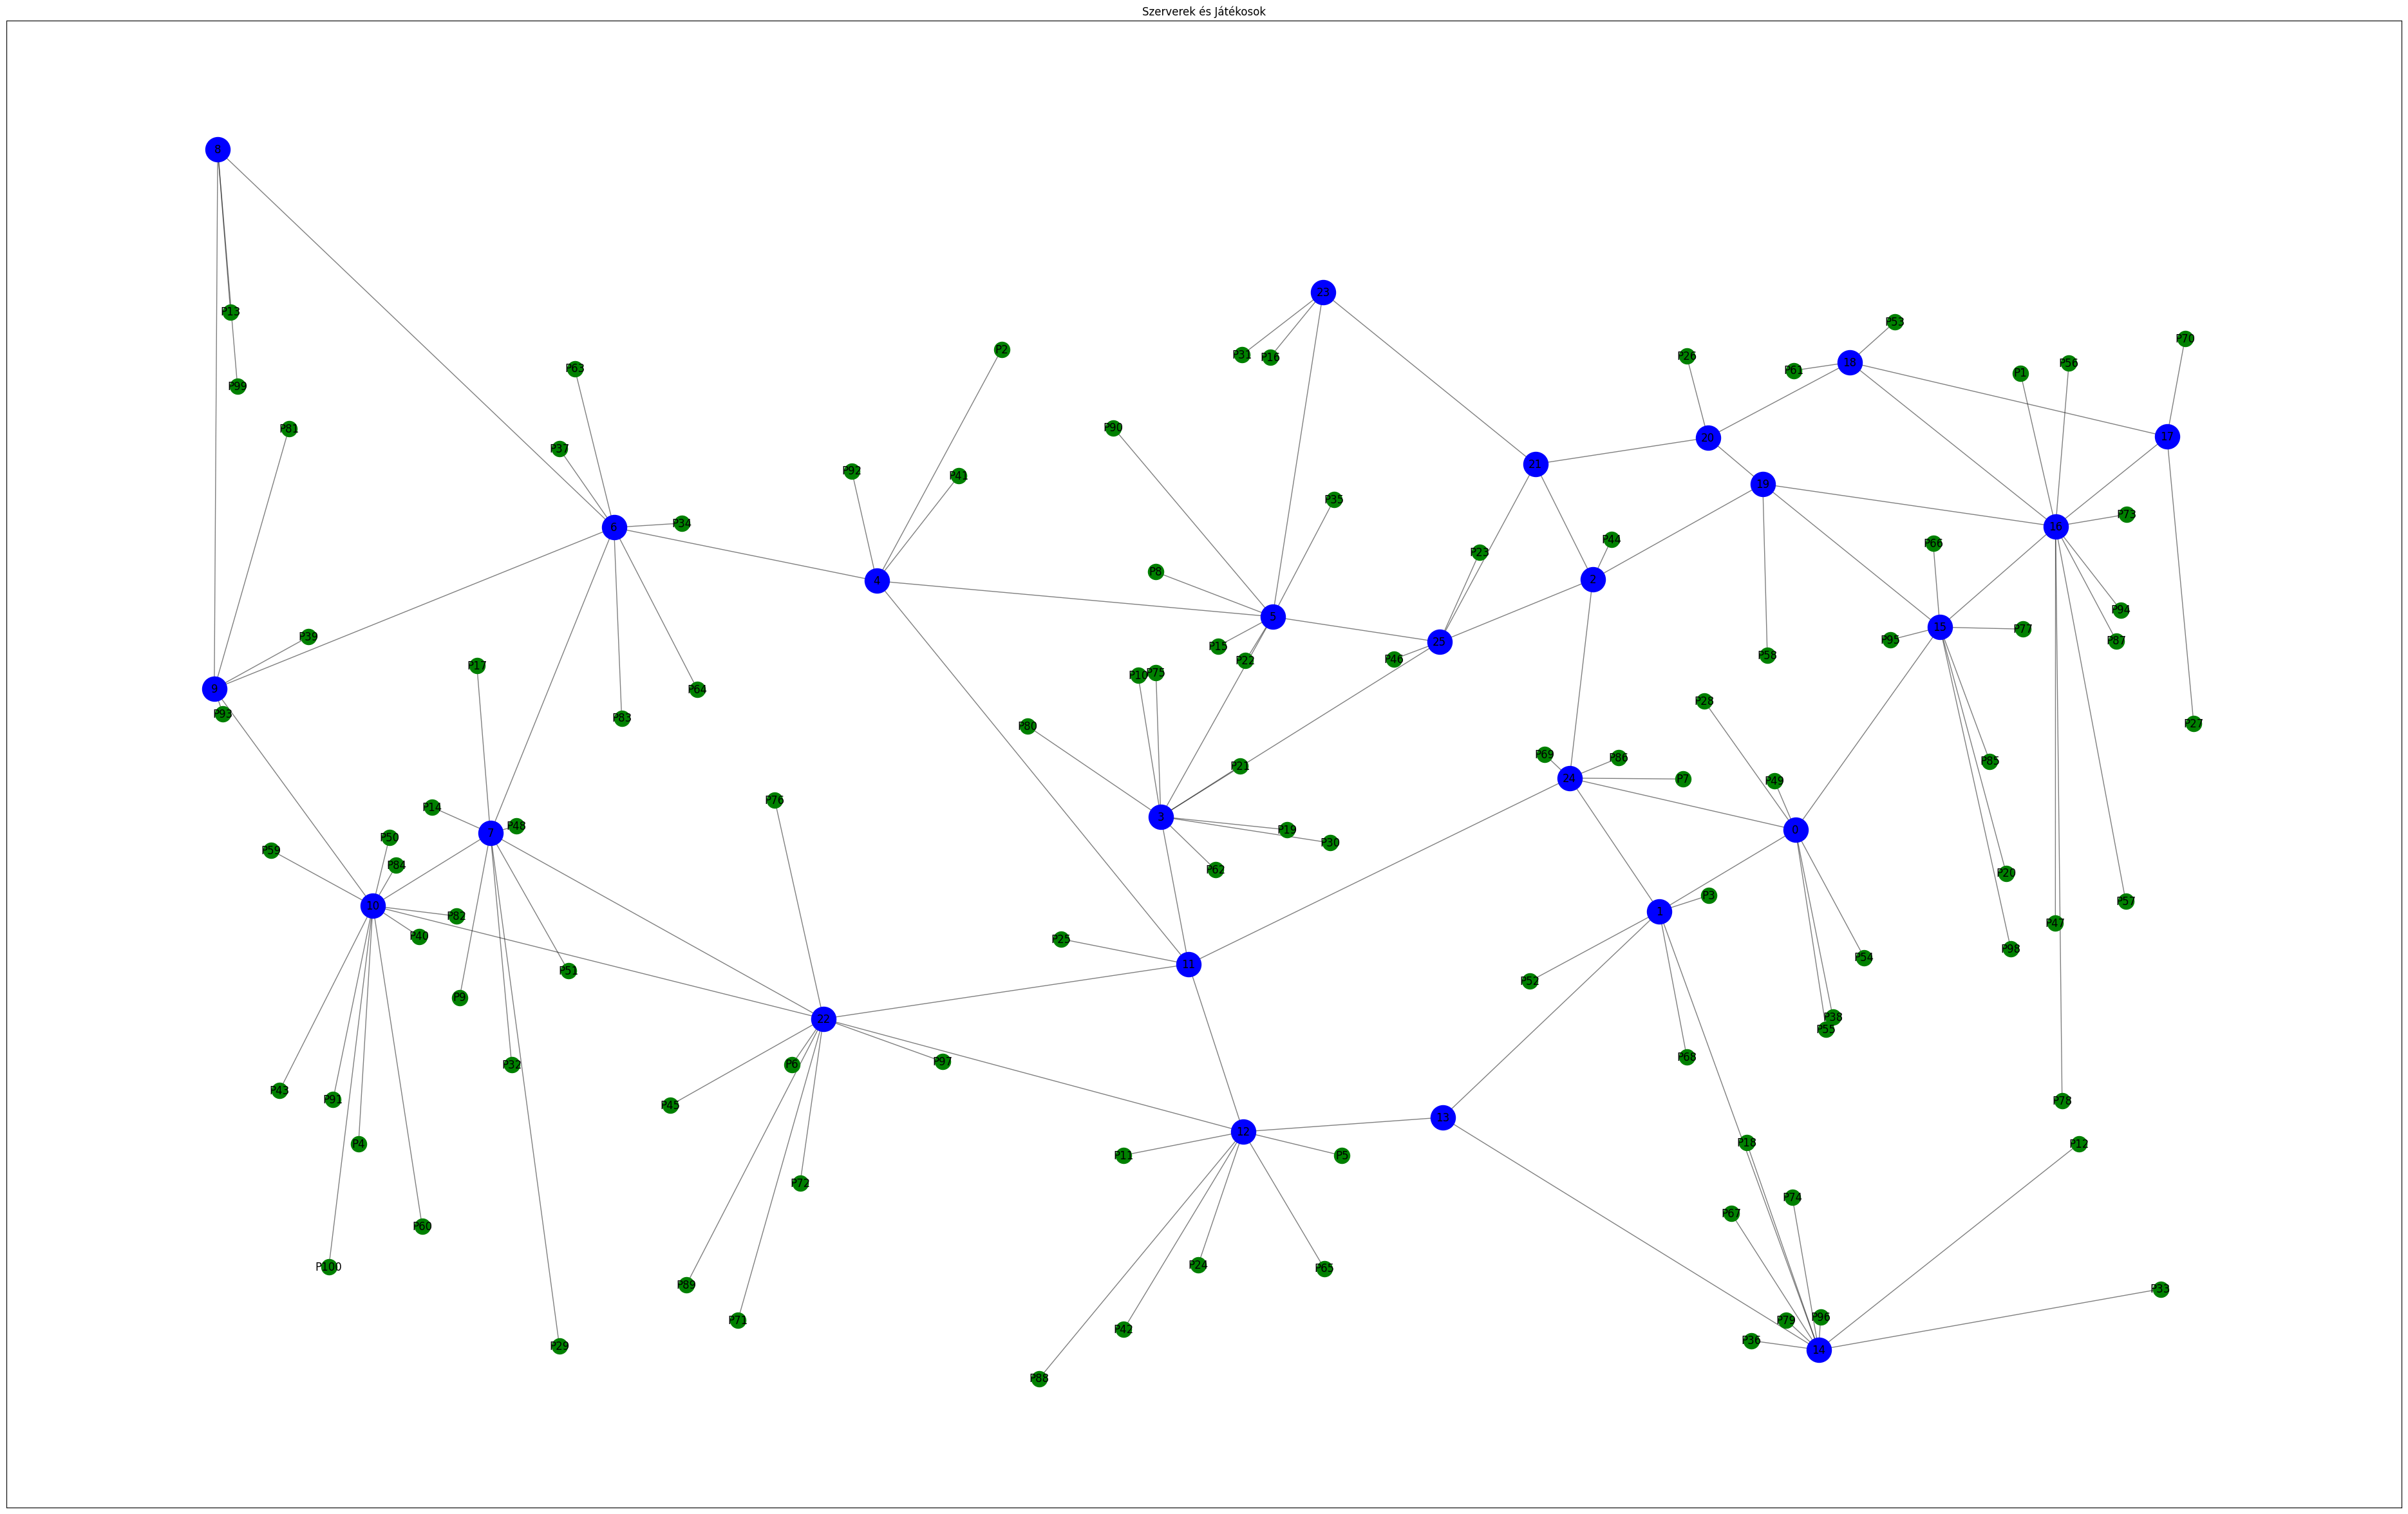

In [6]:
# Adding server nodes
G = nx.read_gml(topology_dir+"26_usa.gml")

# Szerverek pozícióinak kinyerése
server_positions = {}
for node in G.nodes(data=True):
    node_id = node[0]
    node_data = node[1]
    if 'Latitude' in node_data and 'Longitude' in node_data:
        latitude = node_data['Latitude']
        longitude = node_data['Longitude']
        server_positions[node_id] = (longitude, latitude)  # A pozíció sorrendje longitude, latitude


# Adding player
num_players = 100
lat_range = (25,45)
long_range = (-123, -70)
players = generate_players(num_players, long_range, lat_range)
G.add_nodes_from(players.keys())

# Pozíció információk előkészítése
pos = {**server_positions, **players}

# Játékosok összekapcsolása a legközelebbi szerverekkel
for player in players:
    G = connect_player_to_server(players, player, server_positions, G)

# Gráf kirajzolása 
draw_graph(G, pos, server_positions, players, canvas_size=(48, 30), node_size=300, show_edge_labels=False)






In [ ]:
server_positions = {}
for node in G.nodes(data=True):
    node_id = node[0]
    node_data = node[1]
    if 'Latitude' in node_data and 'Longitude' in node_data:
        latitude = node_data['Latitude']
        longitude = node_data['Longitude']
        server_positions[node_id] = (longitude, latitude)  # A pozíció sorrendje longitude, latitude
    

In [17]:
for pos in server_positions.values():
    print(pos)

(-80.83, 35.22)
(-84.41, 33.74)
(-86.16, 39.77)
(-97.52, 35.46)
(-104.99, 39.74)
(-94.58, 39.09)
(-111.9, 40.71)
(-115.15, 35.16)
(-122.32, 47.57)
(-122.41, 37.78)
(-118.24, 33.84)
(-96.79, 32.78)
(-95.35, 29.74)
(-90.11, 30.0)
(-80.22, 25.78)
(-77.03, 38.9)
(-73.99, 40.73)
(-71.06, 42.36)
(-79.4, 43.71)
(-81.69, 41.5)
(-83.13, 42.34)
(-87.67, 41.86)
(-106.39, 31.79)
(-93.25, 44.98)
(-86.77, 36.16)
(-90.19, 38.63)


In [18]:
for pos in players.values():
    print(pos)

(-91.76649270212394, 25.057824277942668)
(-107.94669200804711, 43.30867561095606)
(-99.26794810153046, 26.85109362712516)
(-104.40208722562494, 44.95156444740681)
(-110.89993292669017, 26.508099052182907)
(-114.51756310456315, 31.140074819561423)
(-98.29457854503288, 33.426975095168615)
(-80.37780804167761, 44.14819590566265)
(-75.01254844947555, 35.82209061857924)
(-108.19011784706923, 41.759151227230404)
(-92.32561198562989, 40.96057804020554)
(-122.19111673365315, 29.454833826321334)
(-98.0828285489375, 33.90385488679534)
(-81.7188360608888, 40.53190200873871)
(-117.40912335424608, 33.6037255854679)
(-74.56063595522664, 32.88738460868293)
(-99.47862212560264, 25.789437140854087)
(-121.06300196699533, 35.831871894327)
(-106.1529250516235, 32.805537357014714)
(-110.95590715121908, 27.7724884410344)
(-96.3620813216277, 31.8217406184665)
(-98.39352442199957, 38.274349949653406)
(-94.82267811174184, 26.480693030775775)
(-117.14501725573473, 38.738950705211906)
(-89.89939323471806, 43.415